# Introduction to Variational Autoencoders 
## Introduction, a probabilistic perspective

A typical problem of statistics is that of <a href='https://en.wikipedia.org/wiki/Statistical_inference'> inference</a>. We want to find a probability distribution that represents the population starting from a sample, our dataset. As we show in the following, If our dataset is made of handwritten digits, we can train a neural network to "learn" a probability distribution over handwritten digits. By sampling that distibution, we are able to generate *new* handwritten digits that resemble the ones of the input dataset. In simple words, we trained a computer to generate something that typically humans do, writing things down. 

Thus the model that we want to train has the capacity to *generate* samples. How do we teach the model to do that? One idea is to think that the probability distribution that we want to learn is not only involved with observable features (e.g. colors of pixels of an image) but also with underlying, <a href='https://en.wikipedia.org/wiki/Latent_variable'> unobserved variables</a> that summarize the data. The network can then codify the input with those latent factors, generating a compressed representation of the input. We can then pass the codified input to the generative part of the network from which we can obtain sample that resembles a member the dataset.

The two parts of our model are then an **inferential** network that learns the latent factors and codifies the input data, and a **generative** network that uses the output of the inferential part to generate new data.

The idea behind the inferential part of the network is similar to what is done in <a href='https://en.wikipedia.org/wiki/Factor_analysis'>factor analysis</a>. Broadly speaking, in factor analysis we try do describe the joint variations in the observed variables \pmb{x} by associating them to several unobserved factors. In this sense we are *encoding* the input data with new variables.

In the same fashion, *Variational Autoencoders* are a powerful way to look for such underlying factors since we can leverage the complexity of neural networks, which allow us to find non-linear relationships among the input features.

The task that we are left with is that of **finding the latent factors given the input data**. We can fit this problem in the framework of <a href='https://en.wikipedia.org/wiki/Bayesian_inference'> Bayesian Inference</a>. If the data points are indicated with    $\pmb{x}$    and the latent factors with $\pmb{z}$, then we need to find the **posterior** $p_{\pmb{\theta}}(\pmb{z}|\pmb{x})$: 
$$p_{\pmb{\theta}}(\pmb{z}|\pmb{x}) = \frac{p_{\pmb{\theta}}(\pmb{x}|\pmb{z})\:p(\pmb{z})}{p(\pmb{x})}.$$

Starting from the data  $\pmb{x}$, we **encode** it , for example with a neural network, to obtain its representation into a lower dimensional space, the space of latent features $\pmb{z}$. In order to do that we need to sample from $p_{\pmb{\theta}}(\pmb{z}|\pmb{x})$ (where $\theta$ are some parameters of the distribution) given by the formula above. Unfortunately, the denominator $p(\pmb{x}) = \int p(\pmb{x}|\pmb{z})\,p(\pmb{z})\,d\pmb{z}$ is *intractable*, that is, computationally or analytically prohibitive to calculate. Let us move on for now.

What about the numerator at right hand side? We have the **prior**  $p(\pmb{z})$, which represents our knowledge about how the data is distributed. We're going to assume that the prior can be approximated using a distribution that is general enough and suited for our task. A Normal distribution could be a good guess in many cases (see references).

Then we need to model the likelihood $p_{\pmb{\theta}}(\pmb{x}|\pmb{z})$. It acts as **decoder**, taking a code as input and providing a distribution over the  $\pmb{x}$'s. In other words, If we sample this distribution we obtain one particular $\pmb{x}$. This is the **generative** part of the autoencoder. For example if the input is made of images, a sample from $p_{\pmb{\theta}}(\pmb{x}|\pmb{z})$ returns an image given a code. 

So far we have taken care of the numerator of the formula above, but we haven't found a solution for the intractable denominator. In the <a href='https://en.wikipedia.org/wiki/Variational_Bayesian_methods'> Variational Bayes</a> approach we replace the **posterior** $p_{\pmb{\theta}}(\pmb{z}|\pmb{x})$ with a simpler distribution $q_{\pmb{\phi}}(\pmb{z})$ of known functional form, so we bypass the problem of calculating the marginal distribution $p(\pmb{x})$. In the example below we choose $q_{\pmb{\phi}}$ to be a Bernoulli distribution. Using a specific distribution limits the capacity of the autoencoder but such limitation can be overcome with more advanced models which are out of the scope of this article.

Now we can write our formula again as follows
$$encoder\,=\,p_{\pmb{\theta}}(\pmb{z}|\pmb{x}) = \frac{p_{\pmb{\theta}}(\pmb{x}|\pmb{z})\:p(\pmb{z})}{p(\pmb{x})} = \frac{decoder_{\pmb{\theta}}\times prior}{marginal}\approx q_{\pmb{\phi}}(\pmb{z})$$ 

In the next session we continue to use $q_{\pmb{\phi}}(\pmb{z})$ for simplicity, but in practice we will implement the autoencoder to represent $q_{\pmb{\phi}}(\pmb{z}|\pmb{x})$, that is, the encoder "sees" the input data to find the optimal latent features.

## Variational Bound
Now we need an optimization routine to find the optimal values for the $\theta$'s and the $\psi$'s that would give us the optimal latent features. What loss function shall we use? 

Since we made an approximation in going from $p_{\pmb{\theta}}$ to $q_{\pmb{\phi}}$ the natural path to follow is to try to minimize the distance between these two distribution. The concept of distance that is used most often in Variational Bayes is the (reverse) <a href='https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence'> Kullback–Leibler divergence</a> (KL-divergence), which in our case is:
$$ D_{KL}(Q||P) = \sum_Z q_{\pmb{\theta}}(\pmb{z})\log \frac{q_{\pmb{\phi}}(\pmb{z})}{p_{\pmb{\theta}}(\pmb{z}|\pmb{x})}.$$

The divergence is actually not really a distance since it is not symmetric, but it does give us a measure on how "different" $q$ and $p$ are.

By using the relation $p(\pmb{a},\pmb{b}) = p(\pmb{b}|\pmb{a})\,p(\pmb{a})$ and rearranging we get:

$$\mathcal{L}(\pmb{\theta},\pmb{\phi}; \pmb{x}) = log\,p_{\pmb{\theta}}(\pmb{x}) - D_{KL}(q_{\pmb{\phi}}(\pmb{z})||p_{\pmb{\theta}}(\pmb{x}|\pmb{z})), \;\;\;\; (F1)$$

where

$$ \mathcal{L}(\pmb{\theta},\pmb{\phi}; \pmb{x}) = \sum_Z q_{\pmb{\phi}}(\pmb{z}) \log\frac{q_{\pmb{\phi}}(\pmb{z})}{p_{\pmb{\theta}}(\pmb{x},\pmb{x})}.$$

is the *Evidence or Variational Lower Bound* (elbo).
By making a little effort we can rewrite formula $(F1)$ as:

$$\mathcal{L}(\pmb{\theta},\pmb{\phi}; \pmb{x}) = \mathbb{E}_{q_{\pmb{\phi}}} [log\,p_{\pmb{\theta}}(\pmb{x}|\pmb{z})] - D_{KL}(q_{\pmb{\phi}}(\pmb{z}|\pmb{x})||p_{\pmb{\theta}}(\pmb{x}|\pmb{z})), \;\;\;\; (F2)$$

The last formula tells us that we have two sources of error, some information is lost as we make the approximation $p_{\pmb{\theta}} \approx q_{\pmb{\phi}}$, the second contribution is given by the reconstruction error when we sample $p_{\pmb{\theta}}(\pmb{x}|\pmb{z})$. As the KL-divergence is always positive, we have that $\mathcal{L}\leq \log\,p_{\pmb{\theta}}(\pmb{x}),$ that is $\mathcal{L}$ constitutes a **lower bound** for the log-evidence $p_{\pmb{\theta}}$. In the optimization routine we want to *maximize* the lower bound (or minimize its negative) which corresponds to minimizing the KL-divergence between $p_{\pmb{\theta}}$ to $q_{\pmb{\phi}}$.



## Variational Autoencoders with Neural Networks

To summarize, we started with the problem of **encoding** the data in a lower dimensional space of latent variables. The encoder is the inferential part of the network, it allows us to find the posterior distribution. Along the way we saw that we can naturally see this problem from a Variational Bayes perspective, which in turn, led us to to define also a **decoder**. The decoder is the generative part of the network. 

In the example below, the encoder is a neural network that takes 28x28 pixel input images representing a handwritten digits, that would be our dataset. It returns a distribution $q_{\pmb{\phi}}(\pmb{z}|\pmb{x})$ that we can sample to get the corresponding code $\pmb{z}$. We choose to encode the image in a bi-dimensional space, so the codes are of the pairs of real numbers $(z_1,z_2)$. We take $q_{\pmb{\phi}}$ to be a normal distribution, the variables ${\pmb{\phi}}$ being its mean and standard deviation which are found by optimizing the variational lower bound. 

For the decoder we use a simple dense network. Of course we could use a deconvolutional network but for this example we keep it simple. The decoder represents the likelihood $p_{\pmb{\theta}}(\pmb{x}|\pmb{z})$ and is the generative part of our model. By sampling the from the decoder we get new handwritten digits that the network has never "seen" before.


## Example

### Variational Autoencoder Example on the MNIST dataset of handwritten digits

In this section we get our hands on a variational autoencoder. We focus on writing a simple code to make it easy to link the theory explained above with the program.

First the obvious imports and some convenience functions to handle the plots.

In [ ]:
import tensorflow as tf
import tensorflow.contrib.distributions as tfd
import tensorflow_probability
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tfp = tensorflow_probability.distributions

tf.reset_default_graph()

def plot_codes(ax, codes, labels):
    ax.scatter(codes[:, 0], codes[:, 1], s=2, c=labels, cmap='viridis')
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)


def plot_samples(ax, samples):
    for index, sample in enumerate(samples):
        ax[index].imshow(sample, cmap="Greys")
        ax[index].axis('off')

Now we define the encoder and the decoder networks. As mentioned earlier, the encoder is presented at its input with the data, which in our case are **images of 28x28 pixels that represent handwritten digits**. We choose to encode them in a **bi-dimensional** space, that is the code that represent an image is of the type $(z_1, z_2)$.

### Reparametrization trick
We mentioned before that we would use a <a href='https://www.tensorflow.org/api_docs/python/tf/contrib/distributions/MultivariateNormalDiag'> Normal distribution</a> for the encoder, in order to represent  $q_{\pmb{\phi}}(\pmb{z}|\pmb{x})$.
The procedure is not so straightforward.

In reality to optimize the parameters of the autoencoder we need to take the gradient of the variational lower bound with respect of its parameters. Unfortunately, the first part of the lower bound, that is,
$$\nabla_{\pmb{\phi}}\mathbb{E}_{p_{\pmb{\phi}}(\pmb{z})}[\log p_{\pmb{\theta}}(\pmb{x}|\pmb{z})],$$
is hard to optimize with respect to $\pmb{\phi}$ because the formula that we have for estimating it has a high-variance. 

The trick is to go from the random variable $\pmb{z}$~$q_{\pmb{\phi}}(\pmb{z}|\pmb{x})$ to a variable that depends deterministically on the parameters $\pmb{\phi}$, that is, $\pmb{z} = g(\pmb{\epsilon}|\pmb{x};\pmb{\phi})$,
where $\pmb{\epsilon}$~
$\mathcal{N}(\pmb{0}, \mathbb{I})$. We don't have many limitations on the function $g$, we know we want it to be differentiable though. In the case where $q_{\pmb{\phi}}$ is chosen to be normally distributed, the parameters $\pmb{\phi}$ are still a mean and  a standard deviation and we can choose the function $g$ to be (see reference 1) 
$$\pmb{z} = \pmb{\mu} + \pmb{\sigma} \bullet \pmb{\epsilon},$$

where $\bullet$ is an element wise product.

What do we gain?
By substituting these formulas in (F2), we obtain a lower variance estimate of the variational lower bound. Moreover the encoder is now a deterministic mapping from the input data to the parameters $\pmb{\mu}$ and $\pmb{\sigma}$. 

More precisely, the stochasticity is moved away from $\pmb{z}$ to a variable $\pmb{\epsilon}$ that is not connected to the process that generates the parameters $\pmb{\mu}$ and $\pmb{\sigma}$. Now we generate $\pmb{\mu}$ and $\pmb{\sigma}$ with a neural network, then we have an uncoupled sampling from $\pmb{\epsilon}$ and finally we obtain a code $\pmb{z}$. Before instead, when we just assumed $q_{\pmb{\phi}}$ to be a normal distribution with diagonal covariance, the process that generated the codes $\pmb{z}$ was random, that is, we needed to directly sample a normal distribution.



In [ ]:
def encoder(data, n_factors, rate):
    """ defines the operations that are performed by the encoder.
        The encoder makes inference on the parameters of the
        approximate posterior 'q'. We choose a multivariate Normal.

        Args:
            data (array-like (int)): input data
            n_factors (int): number of latent factors
            rate (float): the dropout rate between 0 and 1
    """
    with tf.variable_scope("encoder", reuse=None):
        x = tf.reshape(data, [-1, 28, 28, 1])
        x = tf.layers.conv2d(x, filters=32,
                             kernel_size=4, 
                             strides=1,
                             padding='same',
                             activation=tf.nn.relu)
        x = tf.layers.dropout(x, rate)
        x = tf.layers.conv2d(x, filters=32, 
                             kernel_size=4,
                             strides=1,
                             padding='same',
                             activation=tf.nn.relu)        
        x = tf.nn.dropout(x, rate)
        x = tf.layers.flatten(x)
        mu = tf.layers.dense(x, n_factors) 
        sigma = tf.layers.dense(x, n_factors, tf.nn.softplus)  
        # we could do this
        # return tfp.MultivariateNormalDiag(loc, scale)
        # and tensorflow would do the trick by itself
        # instead we use the reparametrization
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], 2]))           
        return mu, sigma

The decoder models the likelihood $p_{\pmb{\phi}}(\pmb{x}|\pmb{z})$. We choose a standard fully connected dense architecture instead of a convolutional one to output the logits for a Bernoulli distribution which outputs black and white pixels (ones and zeros). In the next session we'll use so-called deconvolutional layers for the decoder.

In [ ]:
def decoder(code):
    """ defines the operations that are performed by the decoder,
        which is, the generative part of the network. Takes the
        code and decodes it.
        
        Args:
          code (array-like(float)): code given by sampling the encoder         
    """    
    with tf.variable_scope("decoder", reuse=tf.AUTO_REUSE):
        x = tf.layers.dense(code, 200, tf.nn.relu)
        x = tf.layers.dense(x, 400, tf.nn.relu)
        logits = tf.layers.dense(x, np.prod([28, 28]))
        logits = tf.reshape(logits, [-1, 28, 28])
        return tfp.Independent(tfp.Bernoulli(logits), 2)

A reasonable choice for the prior is a Normal distribution. It represents our beliefs about how the latent factors are distributed.

In [ ]:
def prior(code_size):
    """ we make the hypothesis to use a multivariate normal to
        represent our prior beliefs about the latent factors.
    """
    loc = tf.zeros(code_size)
    scale = tf.ones(code_size)
    return tfp.MultivariateNormalDiag(loc, scale)

We then define the tensors that we want to calculate and define the optimizer. After that, we start a session and loop over the epochs. We do not consume all the data for the sake of brevity, we just take a few batches. The results will be good enough with few samples, in fact the handwritten digits are well reproduced by the decoder in just a few epochs.

The line
<font size="1" color="blue"> out_samples = decoder(prior_dist.sample(5)).mean()</font>,

takes samples from the decoder, that is, the reconstructed 28x28 pixel images. First, we sample the prior distribution asking for 5 samples. The output is a two column matrix with 5 rows (remember, the latent space is bi-dimensional), each column has normally distributed values. We feed the matrix to the decoder and get 5 images reconstructed from those codes.

In [ ]:
data = tf.placeholder(tf.float32, [None, 28, 28])

prior_dist = prior(2)  # prior over latent factors p(z)

# encoder
loc, scale = encoder(data, 2, 0.9)  # q(z|x)
approx_posterior = tfp.MultivariateNormalDiag(loc, scale)  # epsilon
sampled_code = approx_posterior.sample()  # this is z

# decoder
likelihood = decoder(sampled_code).log_prob(data)  # p(x|z)

# Define the lower bound to maximize
divergence = tfd.kl_divergence(approx_posterior, prior_dist)

# the lower bound is the error in the reconstruction plus the
# error in encoding (due to the approximation p(z|x) ~ q(z|x))
lower_bound = tf.reduce_mean(likelihood - divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-lower_bound)

# once the network is trained, to "use" it, sample the output
# (decoder or p(x|z). First we need z from the (trained) network,
# so take a sample from p(z), the prior (prior_dist), and feed it to
# the decoder or p(x|z)
out_samples = decoder(prior_dist.sample(5)).mean()

# load the images
mnist = input_data.read_data_sets('MNIST_data/')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Now let's start the session and perform the training. We are feeding all the images in the dataset, 100 at a time.

The line
<font size="1" color="blue"> test_elbo, test_codes = sess.run([lower_bound, sampled_code], feed)</font>

calculates two tensors. First of all we compute the error (evidence lower bound), then a sample of the posterior (encoder) given all the test images (10k). In return we get 10k codes, that is, bi-dimensional arrays of the type $(z_1, z_2)$ which we plot on the left in the figure below.
In the line 
<font size="1" color="blue">test_samples = sess.run(out_samples)</font>

Finally we calculate the output of the decoder. 
 

Epoch 1. Elbo = -543.9078979492188
Epoch 2. Elbo = -174.75265502929688
Epoch 3. Elbo = -167.800537109375
Epoch 4. Elbo = -164.23641967773438
Epoch 5. Elbo = -162.0620574951172
Epoch 6. Elbo = -161.04782104492188
Epoch 7. Elbo = -159.35311889648438
Epoch 8. Elbo = -158.6122283935547
Epoch 9. Elbo = -157.70135498046875
Epoch 10. Elbo = -156.76406860351562
Epoch 11. Elbo = -156.765625
Epoch 12. Elbo = -156.19618225097656
Epoch 13. Elbo = -155.60629272460938
Epoch 14. Elbo = -155.3084259033203
Epoch 15. Elbo = -154.99742126464844
Epoch 16. Elbo = -154.39596557617188
Epoch 17. Elbo = -154.06480407714844
Epoch 18. Elbo = -154.15025329589844
Epoch 19. Elbo = -153.84442138671875
Epoch 20. Elbo = -153.6197509765625


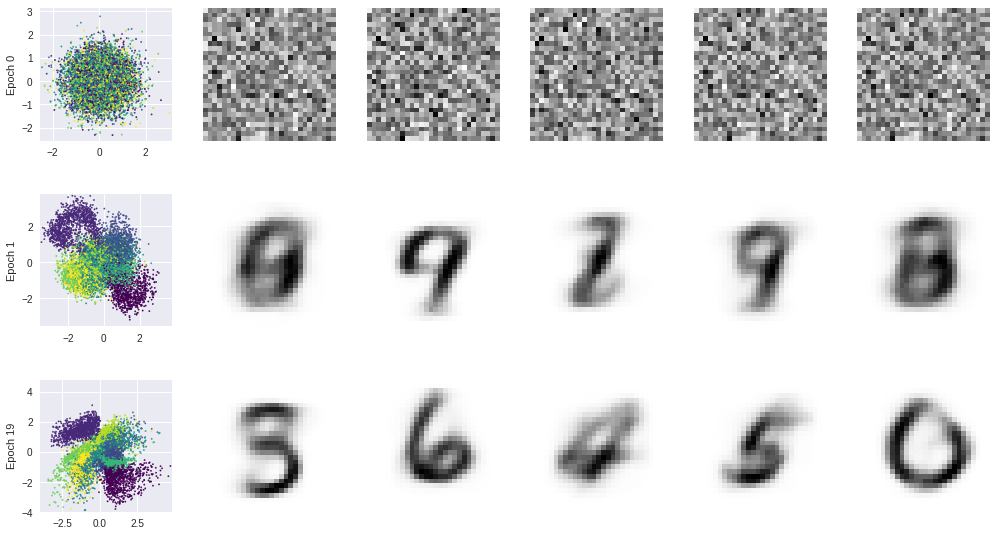

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(14, 8))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(20):
    # PRINT ERROR & PLOT
    feed = {data: mnist.test.images.reshape([-1, 28, 28])}
    test_elbo, test_codes = sess.run([lower_bound, sampled_code], feed)
    test_samples = sess.run(out_samples)
    if epoch == 0 or epoch == 1:
        ax[epoch, 0].set_ylabel('Epoch {}'.format(epoch))
        plot_codes(ax[epoch, 0], test_codes, mnist.test.labels)
        plot_samples(ax[epoch, 1:], test_samples)
    print("Epoch {}. Elbo = {}".format(epoch + 1, test_elbo))
    # BATCH TRAINING
    for _ in range(300):
        feed = {data: mnist.train.next_batch(200)[0].reshape([-1, 28, 28])}
        sess.run(optimize, feed_dict=feed)

feed = {data: mnist.test.images.reshape([-1, 28, 28])}
test_codes, test_samples = sess.run([sampled_code, out_samples], feed)
ax[2, 0].set_ylabel('Epoch {}'.format(epoch))
plot_codes(ax[2, 0], test_codes, mnist.test.labels)
plot_samples(ax[2, 1:], test_samples)

plt.tight_layout()
plt.show()

In the beginning, images of handwritten digits are fed to the encoder which is initialized with random weights and biases. The result is that the generated codes are all randomly distributed around zero, look at the picture on the left of the first row (epoch 0). The decoder is then fed "noise" and is unable to reproduce any digits. As the training procedes, the encoder gets better and better at discovering the features that are characteristic of different digits. In other words the encoder gets better at discriminating different digits and in producing codes that are more separated. 

After a few epochs the networks have been trained well enough to produce clusters of codes which are quite well separated and the reconstructed digits are clearer.

## Generating Handwritten Digits

One of the most interesting things we can do is to guess some codes $(z_1, z_2)$. For example by looking at the figure above on the left we can try to sample different points from different colored areas and see what digits they correspond to. We don't need to sample the prior, in fact the decoder doesn't care where the code comes from, as long as the codes potentially represent a number. 

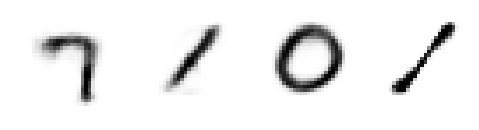

In [ ]:
val = tf.convert_to_tensor(np.array([[-2.5, -2], [0.1, 2], [2.25, -2], [0, 4]], dtype=np.float32))
c = sess.run(decoder(val).mean())

f, ax = plt.subplots(1,4)
for i in range(4):
  ax[i].imshow(c[i], cmap="Greys")
  ax[i].axis('off')


In [ ]:
sess.close()

## References



1.   <a href='https://arxiv.org/pdf/1312.6114.pdf'> Auto-Encoding Variational Bayes</a> by Diederik P. Kingma and Max Welling 
2.   <a href='https://danijar.com/building-variational-auto-encoders-in-tensorflow/'> Building Variational Auto-Encoders in TensorFlow</a>, by Danijar Hafner.
3.   <a href='https://bjlkeng.github.io/posts/variational-bayes-and-the-mean-field-approximation/'> Variational Bayes and The Mean-Field Approximation</a>, by Brian Keng.
4.   <a href='https://towardsdatascience.com/teaching-a-variational-autoencoder-vae-to-draw-mnist-characters-978675c95776'> Teaching a Variational Autoencoder (VAE) to draw MNIST characters</a> by Felix Mohr.

